<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/Assignments/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 - Image Processing
MSE 7530, Fall 2025

This assignment is meant to be somewhat of a break from the last assignments which were quite quantitative. In this assignment, you will pick your favorite scientific image in which you want to count particles, find borders, find domain sizes, or otherwise quantify. You may use any source; if you are stuck, you may want to start with the resources posted in the Canvas Modules.

Your single assignment is first to pick an image (or time series of images) and **state an image-processing goal**: for example, to determine the distance that a crystal grew in a specific amount of time, or to count the number of bacteria colonies in a petri dish. Then, load this image into a NumPy array (code provided in class notebook) and perform your choice of operations to bring you closer to solving the problem. **You do not need to solve the problem**: if you do solve the problem, show how you did it and explain how this would speed up analysis; comment on whether it would be easy to automate or if you would need human intervention. If you are not able to meet your goal, state what makes the image difficult to process. Skim the assigned reading and see if there are any tools that look like they might help, and state them.

I encourage you to spend as much effort on this assignment as you want; if you regularly analyze images in your research, this is a great opportunity to think about automating your own workflow and getting my help/advice for free.

The aim of this notebook is to be able to evalute the attached multi-material weilds. Using the process below to idenedtice where the the material weilds is located, how fine or smooth the material wield melded with the other two materials. Final I also want to be able to located each different section of material.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/AngleKit/MSE7530Codes

Cloning into 'MSE7530Codes'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 76 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 21.19 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [3]:
sub1_file = '/content/MSE7530Codes/Assignments/Substrate/50X_1.JPG'
sub2_file = '/content/MSE7530Codes/Assignments/Substrate/50X_2.JPG'
sub3_file = '/content/MSE7530Codes/Assignments/Substrate/50X_3.JPG'
sub4_file = '/content/MSE7530Codes/Assignments/Substrate/50X_4.JPG'



In [4]:
import skimage as ski
import scipy.ndimage as ndi

In [5]:
sample1= ski.io.imread(sub1_file)
sample2= ski.io.imread(sub2_file)
sample3= ski.io.imread(sub3_file)
sample4= ski.io.imread(sub4_file)

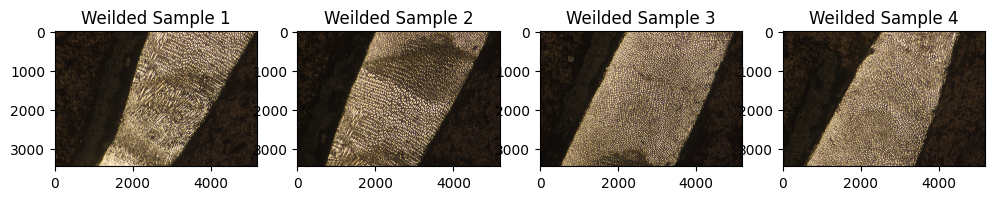

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
ax[0].imshow(sample1, cmap='gray') # represents the 2D array as something we can see
ax[1].imshow(sample2, cmap='gray') # 'gray' is the colormap we use
ax[2].imshow(sample3, cmap='gray') # represents the 2D array as something we can see
ax[3].imshow(sample4, cmap='gray') # 'gray' is the colormap we use
ax[0].set_title('Weilded Sample 1')
ax[1].set_title('Weilded Sample 2')
ax[2].set_title('Weilded Sample 3')
ax[3].set_title('Weilded Sample 4')
plt.show()

Zooming near weild

Text(0.5, 1.0, 'Weilded Sample 2')

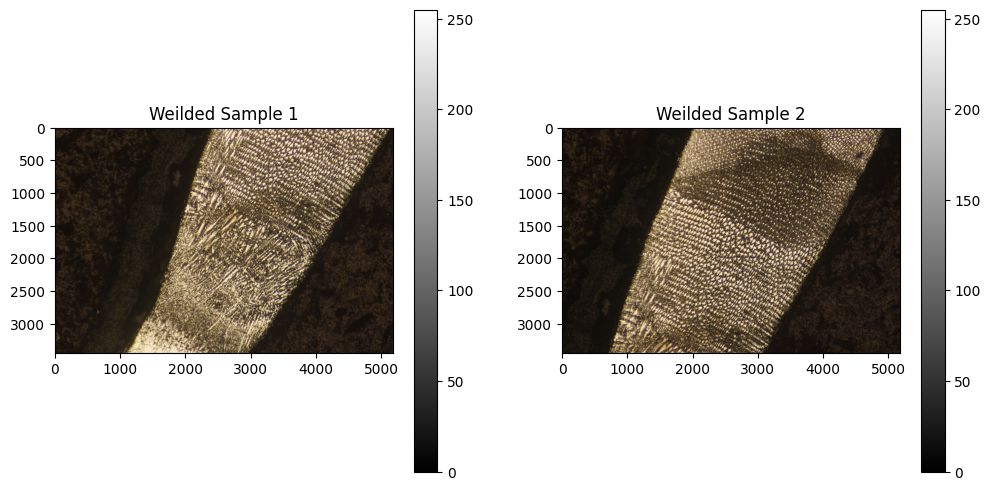

In [22]:
#s1_cut = sample1[1000:2000, 1000:2000] # zoom
#s2_cut = sample2[1000:2000, 1000:2000]
s1_cut = sample1
s2_cut = sample2

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
cb = ax[0].imshow(s1_cut, cmap='gray') # cb = colorbar
plt.colorbar(cb,ax=ax[0]) # 2nd part of the colorbar command
cb = ax[1].imshow(s2_cut, cmap='gray')
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Weilded Sample 1')
ax[1].set_title('Weilded Sample 2')

I found that zooming cause the image to be to blurry to see the small texture differnces between the weild metal and the actual combined metals

Attmept gradient

Text(0.5, 1.0, 'Y Gradient')

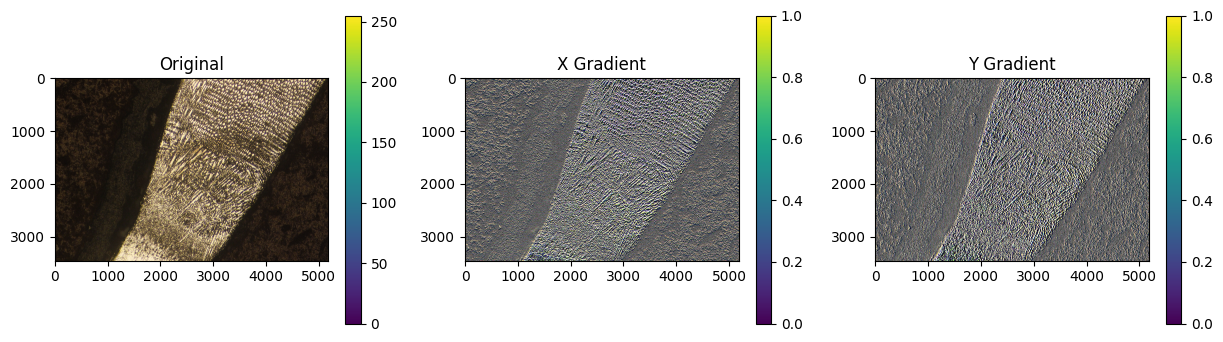

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
cb = ax[0].imshow(s1_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(s1_cut)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(s1_cut)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

While I do not know why the color is so stange, this works very will to see the texture differneaces between the varying areas. The vally like areas are where the weild metals have melded the two other materials together. I belive the Y gradient does a bitter job of showing the changes than the X

Smoothing attempt

Text(0.5, 1.0, 'Y Gradient')

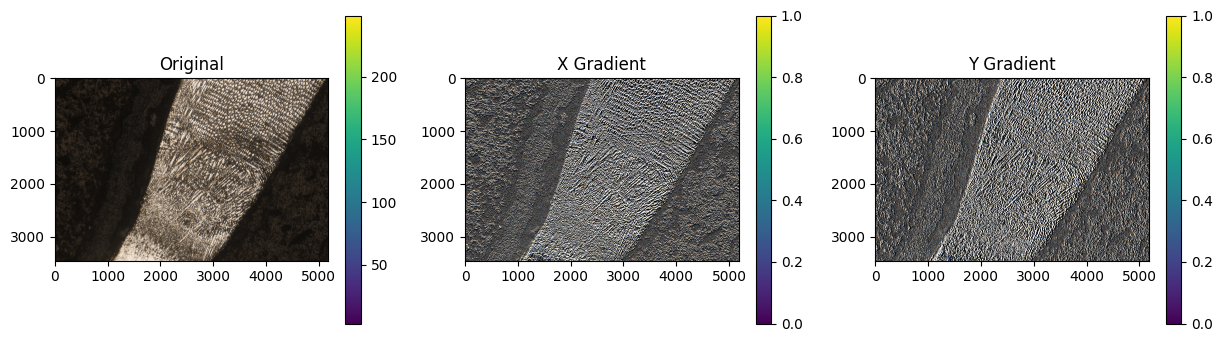

In [24]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
smooth = ndi.gaussian_filter(s1_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(smooth)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(smooth)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

The smoothing provides really good texture veriation for the sample. It does a shows clear areas of the 3 varying the materials that make up this sample.

Personal note: I was unable to find were or how in class we were able to take the pixel maps and turn them into a graph data. so that I can full map out the weild area and the nickle area.